# Clasificación de caracoles utilizando SVM

fuente:https://jdvelasq.github.io/courses/notebooks/sklearn_supervised_03_svm/1-03-olivetti-faces-svm.html

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from pathlib import Path
import glob
import matplotlib.pyplot as plt

## Preparamos el dataset

In [2]:
df = pd.DataFrame()

### Añadimos los datos al dataframe

In [3]:
# Conectamos con drive.google
from google.colab import drive
drive.mount('/content/drive/')

# Creamos las columnas
df['imagen']=None
df['data']=None
df['imagenvec']=None
df['nombreImagen']=None
df['target']=None

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:

for filepath in glob.iglob('/content/drive/MyDrive/TFM-IA/snail-spicie/SVM/*.*'):
  src = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
  src_gray= cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
  data=src_gray.flatten()
  print(data.size)
  if (filepath[-7]=='1'):
    target='cochlicella acuta'
  if (filepath[-7]=='2'):
    target='Ferussacia folliculus'
  if (filepath[-7]=='3'):
    target='Otala latea'
  print(filepath + " " + target)
  fila = {'imagenvec': data, 'imagen': src, 'nombreImagen': filepath, 'target':target}
  df = df.append(fila, ignore_index=True)

693248
698368
307200
264960
786432
628992
233600
1025024
360000
106800
786432
699392
192000
588800
149500
239940
271360
57600
786432
272640
590848
102240
786432
786432
245760
786432
589824
719872
279838
1048576
216960
698368
786432
54000
272640
786432
230400
700416
305920
674816
318080
786432
43120
270000
838656
346112
696320
88800
786432
786432
240000
181760
642048
91089
701440
1048576
183750
699392
139440
699392
230400
697344
700416
231040
151040
786432
204800
696320
699392
696320
786432
786432
238720
442368
155250
316800
699392
786432
269440
67500
242004
1048576
256000
786432
787456
271360
786432
46750
54000
266880
230400
271440
126960
270720
230400
233600
286720
838656
1041408
144460
230400


In [ ]:
df.data=df.imagenvec.array


Veamos las imágenes que hemos introducido

In [7]:
def print_snails(images,target,top_n):
  fig = plt.figure(figsize=(12,12))
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05,wspace=0.05)
  for i in range(top_n):
    p=fig.add_subplot(6,6, i+1,xticks=[], yticks=[])
    p.imshow(images[i])
    p.text(0,20,target[i])
    p.text(0,60,str(i))

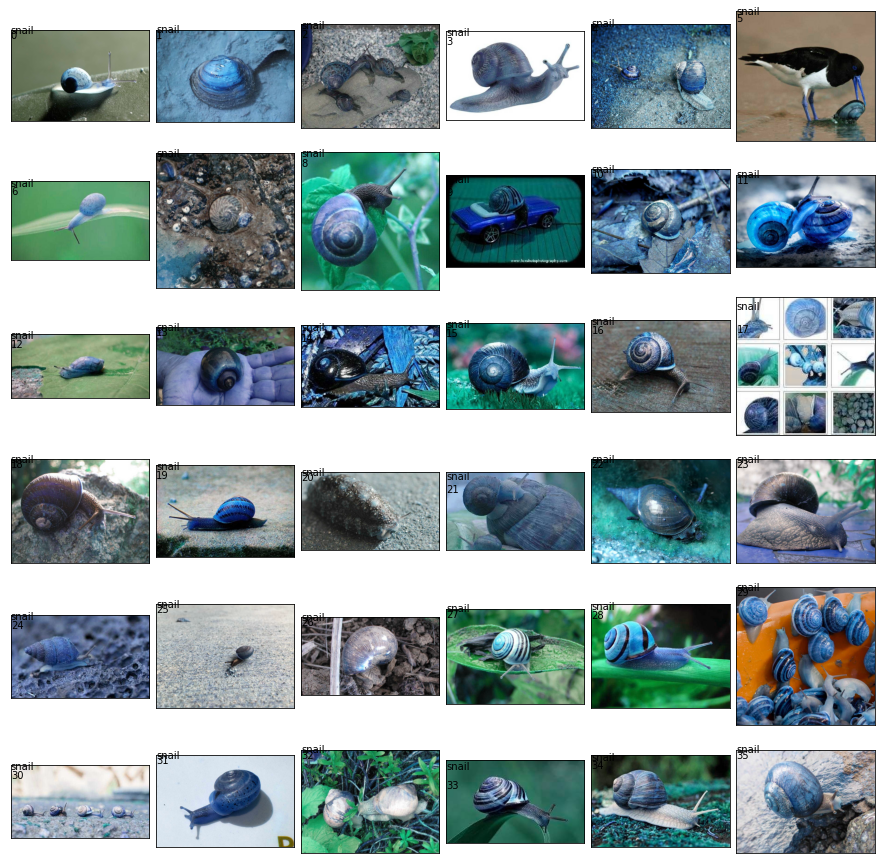

In [8]:
print_snails(df.imagen,df.target,36)

El dataset está preparado para ser tratado. Soy consciente que hay muy pòcas imágenes 

# Identificación de la especie de caracol

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.data.tolist(), df.target, test_size=0.3333, random_state=0)

In [ ]:
from sklearn.svm import SVC

modellineal=SVC(kernel='linear')
modelpoly=SVC(kernel='poly')
modelsigmoid=SVC(kernel='sigmoid')

In [ ]:
X_train[1]


array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

Usaremos crossValidation

In [ ]:
from scipy.stats import sem
from sklearn.model_selection import KFold, cross_val_score

def evaluate_cross_val(mod, X,y,n_splits):
  kf=KFold(n_splits=n_splits, shuffle=True, random_state=5)
  cv=kf.get_n_splits(X)
  scores = cross_val_score(mod, X, y , cv=cv)
  # resultados
  print(scores)
  print("mean Socore: {0:.2f} (+/-{1:.2f})".format(np.mean(scores), sem(scores)))

In [ ]:
evaluate_cross_val(modelsigmoid, X_train, y_train, n_splits=3)

[0.375 0.375 0.5  ]
mean Socore: 0.42 (+/-0.04)


In [ ]:
from sklearn import metrics
def train_and_eval(mod, X_train, X_test, y_train, y_test):
  mod.fit(X_train, y_train)
  print("Accuracy training ")
  print(mod.score(X_train, y_train))
  print("Accuracy testing ")
  print(mod.score(X_test, y_test))
  ypred=mod.predict(X_test)
  print ("clasiffication report")
  print(metrics.classification_report(y_test, ypred))
  print("matriz de confución")
  print(metrics.confusion_matrix(y_test,ypred))


In [ ]:
train_and_eval(modelsigmoid,X_train,X_test,y_train,y_test)

Accuracy training 
0.4166666666666667
Accuracy testing 
0.16666666666666666
clasiffication report
                       precision    recall  f1-score   support

Ferussacia folliculus       0.00      0.00      0.00         5
          Otala latea       0.00      0.00      0.00         5
    cochlicella acuta       0.17      1.00      0.29         2

             accuracy                           0.17        12
            macro avg       0.06      0.33      0.10        12
         weighted avg       0.03      0.17      0.05        12

matriz de confución
[[0 0 5]
 [0 0 5]
 [0 0 2]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
